## **Многоклассовая классификация зерен фасоли методами машинного обучения**

Для модели классификации с помощью камеры с высоким разрешением были сделаны изображения 13611 зерен фасоли 7 различных зарегистрированных сортов. Изображения зерен, полученные системой компьютерного зрения, были подвергнуты этапам сортировки и выделения признаков, всего 16 признаков; были получены 12 показателей  размеров и 4 форм-фактора.

Описание признаков:

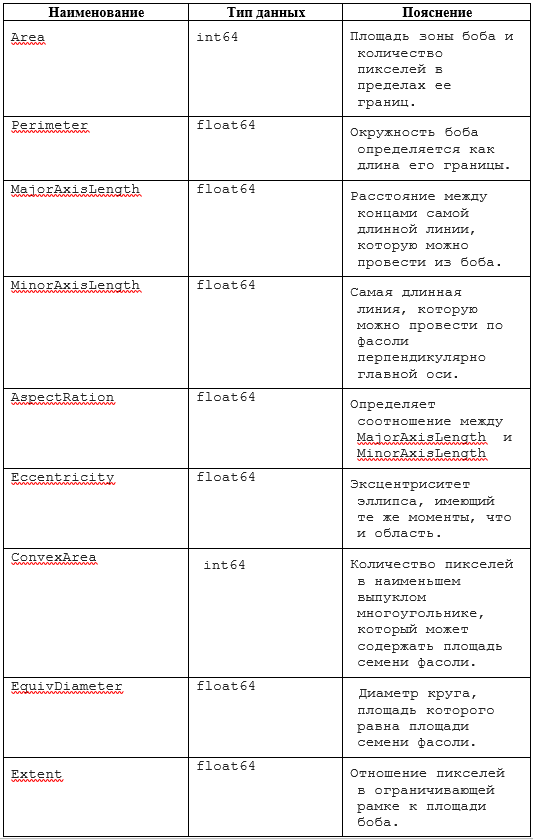
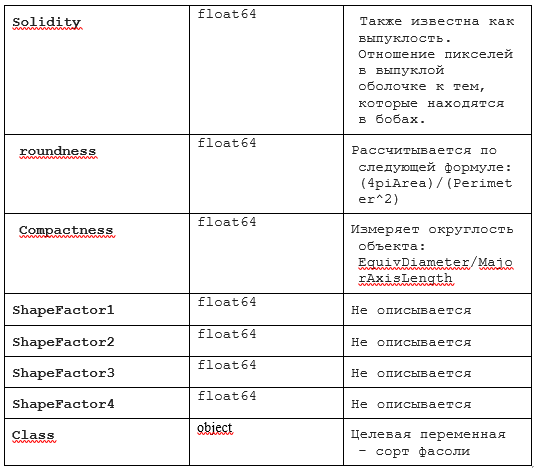

Импортирует библиотеки и загружаем датасет

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import sklearn

from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn import metrics
from sklearn import ensemblefrom google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/Git/Dry_Bean_Dataset.xlsx')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
# выводим информацию о датасете

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
# для удобства приведем название столбцов к нижнему регистру

df.columns = df.columns.str.lower()
df.columns

Index(['area', 'perimeter', 'majoraxislength', 'minoraxislength',
       'aspectration', 'eccentricity', 'convexarea', 'equivdiameter', 'extent',
       'solidity', 'roundness', 'compactness', 'shapefactor1', 'shapefactor2',
       'shapefactor3', 'shapefactor4', 'class'],
      dtype='object')

In [ ]:
# далее проверяем на наличие дублей и удаляем

df.duplicated().sum()

68

In [ ]:
df = df.drop_duplicates()

In [ ]:
# смотрим на информация о пропусках

df.isnull().sum()

area               0
perimeter          0
majoraxislength    0
minoraxislength    0
aspectration       0
eccentricity       0
convexarea         0
equivdiameter      0
extent             0
solidity           0
roundness          0
compactness        0
shapefactor1       0
shapefactor2       0
shapefactor3       0
shapefactor4       0
class              0
dtype: int64

<ipython-input-39-3fbccf604983>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['class'].replace({'DERMASON':6, 'SIRA':5, 'SEKER':4, 'HOROZ':3, 'CALI':2, 'BARBUNYA':1, 'BOMBAY':0})


<Axes: >

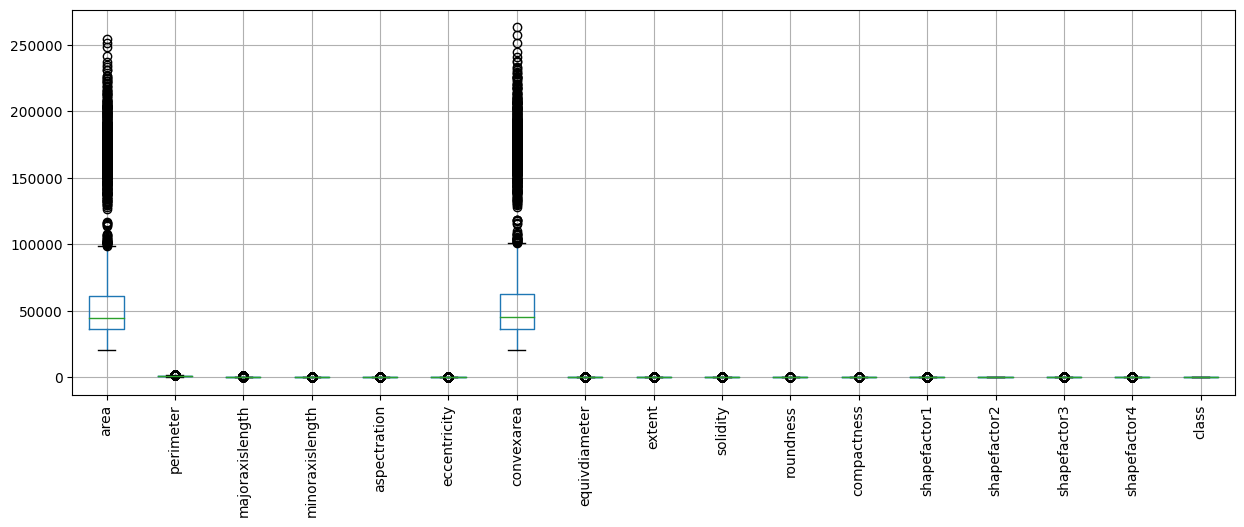

In [ ]:
# проверяем данные на наличие статистических выбросов

df.boxplot(figsize = (15, 5), rot = 90) 

<ipython-input-41-97456676453b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["area"] = np.log(df["area"])
<ipython-input-41-97456676453b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["convexarea"] = np.log(df["convexarea"])


<Axes: >

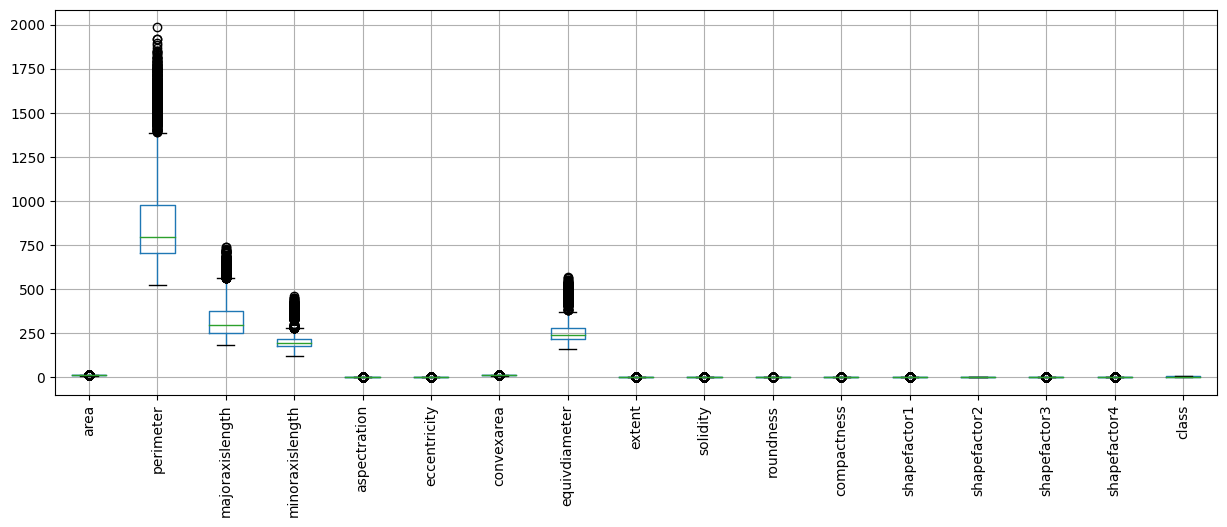

In [ ]:
# прологарифмирую "area" и "convexarea" чтобы уменьшить выбросы

df["area"] = np.log(df["area"])
df["convexarea"] = np.log(df["convexarea"])
df.boxplot(figsize = (15, 5), rot = 90) 

После первого логарифмирования выявились переменные, которые также имеют выбросы. Считаю также необходимым прологарифмировать и их

<ipython-input-43-3da4ebb77fd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['perimeter'] = np.log(df['perimeter'])
<ipython-input-43-3da4ebb77fd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['majoraxislength'] = np.log(df['majoraxislength'])
<ipython-input-43-3da4ebb77fd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

<Axes: >

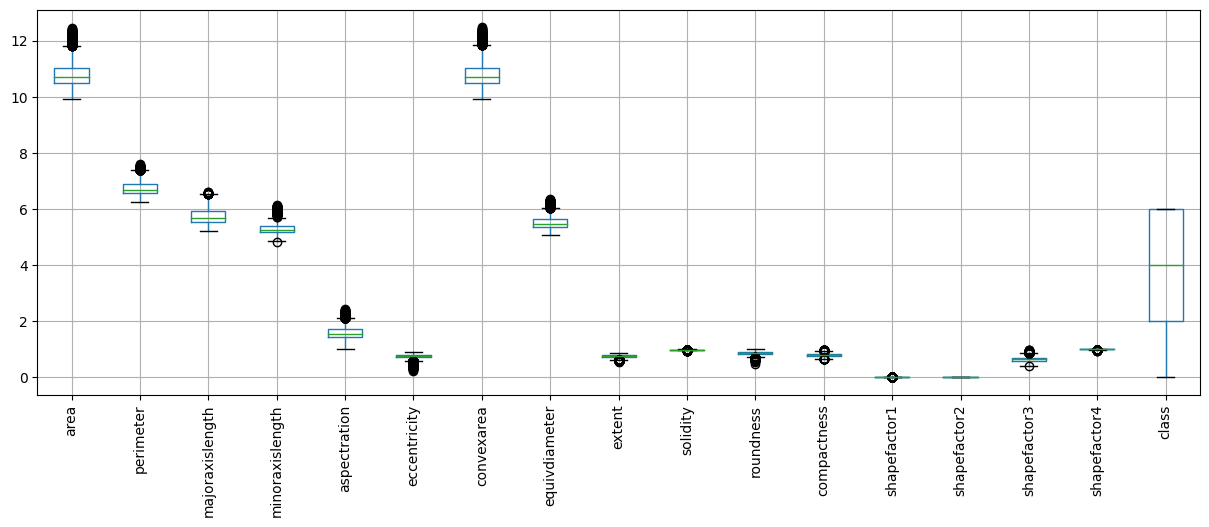

In [ ]:
df['perimeter'] = np.log(df['perimeter'])
df['majoraxislength'] = np.log(df['majoraxislength'])
df['minoraxislength'] = np.log(df['minoraxislength'])
df['equivdiameter'] = np.log(df['equivdiameter'])
df.boxplot(figsize = (15, 5), rot = 90)

Следующим шагом в подготовке данных к моделированию является изменения типа целевой переменной с типа OBJECT на тип INTEGER путем присвоение каждому сорту числового значения от 0 до 6:

In [ ]:
df['class'] = df['class'].replace({'DERMASON':6, 'SIRA':5, 'SEKER':4, 'HOROZ':3, 'CALI':2, 'BARBUNYA':1, 'BOMBAY':0})

In [ ]:
# импортируем функцию для случайного разбиения на тестовую и тренировочную выборки

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('class', axis = 1), df['class'], test_size = 0.2, random_state = 42) 
Y_train

5963     3
13060    6
10327    6
591      4
10931    6
        ..
5191     2
13486    6
5390     2
860      4
7336     3
Name: class, Length: 10834, dtype: int64

In [ ]:
# Применение модели "Случайного леса" с расширением OneVsRestClassifier

model = OneVsRestClassifier(sklearn.ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 2, min_weight_fraction_leaf = 0.01, min_impurity_decrease = 0.0001)).fit(X_train, Y_train)
rf_pred_OVR = model.predict(X_test)
rf_pred_OVR

array([4, 1, 6, ..., 6, 5, 5])

Для оценки качества классификации вывдем матрицу неточностей и график  ROC-кривых:

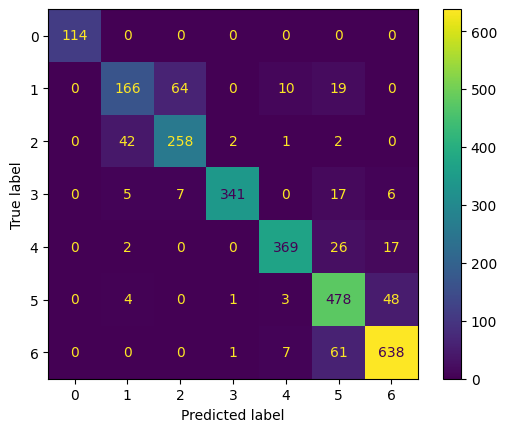

In [ ]:
rf = sklearn.metrics.confusion_matrix(Y_test, rf_pred_OVR)
sklearn.metrics.ConfusionMatrixDisplay(rf).plot()

In [ ]:
# выводим метрики качества

rf_trivial = np.mean((Y_test - Y_train.mean()) ** 2)
rf_ours = np.mean((Y_test - rf_pred_OVR) ** 2)
print('trivial:', rf_trivial)
print('ours:', rf_ours)
rf_precision = metrics.precision_score(Y_test, rf_pred_OVR, average='macro')
print('precision =', rf_precision)
rf_f1_score = metrics.f1_score(Y_test, rf_pred_OVR, average='weighted')
print('f1_score =', rf_f1_score)

trivial: 3.3540354230942566
ours: 0.3698781838316722
precision = 0.8813295924141623
f1_score = 0.8726069076687282


In [ ]:
# Применение модели "Градиентного бустинга" с расширением OneVsRestClassifier

model = OneVsRestClassifier(sklearn.ensemble.GradientBoostingClassifier(n_estimators=100, max_depth = 3, min_samples_leaf = 50)).fit(X_train, Y_train)
gb_pred = model.predict(X_test)
gb_pred

array([4, 2, 6, ..., 6, 5, 5])

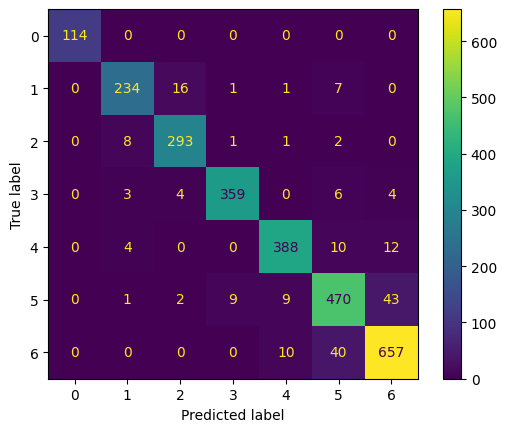

In [ ]:
# расчет матрицы неточностей

conf_matrix_gb = sklearn.metrics.confusion_matrix(Y_test, gb_pred) 
sklearn.metrics.ConfusionMatrixDisplay(conf_matrix_gb).plot()

In [ ]:
# выводим метрики качества

gb_trivial = np.mean((Y_test - Y_train.mean()) ** 2)
gb_ours = np.mean((Y_test - gb_pred) ** 2)
print('trivial:', gb_trivial)
print('ours:', gb_ours)
gb_precision = metrics.precision_score(Y_test, gb_pred, average='macro')
print('precision =', gb_precision)
gb_f1_score = metrics.f1_score(Y_test, gb_pred, average='weighted')
print('f1_score =', gb_f1_score)

trivial: 3.3540354230942566
ours: 0.20081210778885197
precision = 0.9401695279161488
f1_score = 0.928409515795095


In [ ]:
# Применение модели "Найвный Байесовский" с расширением OneVsRestClassifier

from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
model = OneVsRestClassifier(GaussianNB()).fit(X_train, Y_train)
nb_pred = model.predict(X_test)
nb_pred

array([4, 1, 6, ..., 6, 5, 5])

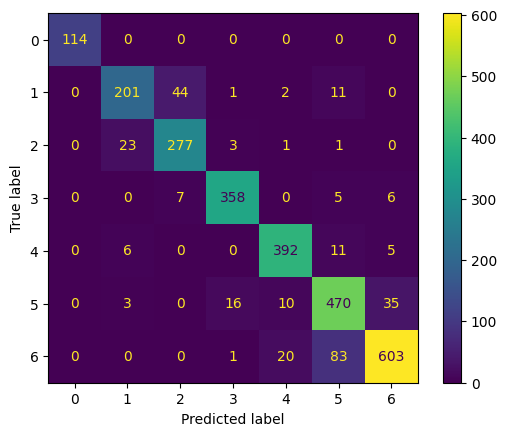

In [ ]:
conf_matrix_NB = sklearn.metrics.confusion_matrix(Y_test, nb_pred)
sklearn.metrics.ConfusionMatrixDisplay(conf_matrix_NB).plot() 

In [ ]:
# выводим метрики качества

nb_trivial = np.mean((Y_test - Y_train.mean()) ** 2)
nb_ours = np.mean((Y_test - nb_pred) ** 2)
print('trivial:', nb_trivial)
print('ours:', nb_ours)
nb_precision = metrics.precision_score(Y_test, nb_pred, average='macro')
print('precision =',nb_precision)
nb_f1_score = metrics.f1_score(Y_test, nb_pred, average='weighted')
print('f1_score =', nb_f1_score)

trivial: 3.3540354230942566
ours: 0.28645256552233295
precision = 0.9017412744740847
f1_score = 0.8914638568506121


In [ ]:
# Применение модели "Ближайших соседей" с расширением OneVsRestClassifier

model = OneVsRestClassifier(sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5, p = 2)).fit(X_train, Y_train)
knn_pred = model.predict(X_test)
knn_pred

array([4, 1, 6, ..., 6, 5, 5])

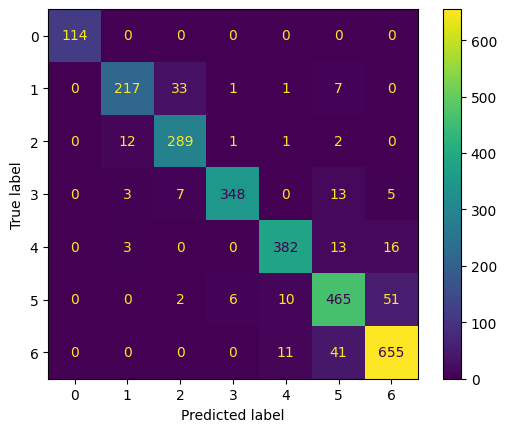

In [ ]:
conf_matrix_knn = sklearn.metrics.confusion_matrix(Y_test, knn_pred) 
sklearn.metrics.ConfusionMatrixDisplay(conf_matrix_knn).plot() 

In [ ]:
# выводим метрики качества

knn_trivial = np.mean((Y_test - Y_train.mean()) ** 2)
knn_ours = np.mean((Y_test - knn_pred) ** 2)
print('trivial:', knn_trivial)
print('ours:', knn_ours)
knn_precision = metrics.precision_score(Y_test, knn_pred, average='macro')
print('precision =', knn_precision)
knn_f1_score = metrics.f1_score(Y_test, knn_pred, average='weighted')
print('f1_score =', knn_f1_score)

trivial: 3.3540354230942566
ours: 0.22185308231819859
precision = 0.9253908962575738
f1_score = 0.9118755447550734


In [ ]:
report = pd.DataFrame({'RF': [round(rf_trivial, 2), round(rf_ours, 2), round(rf_precision, 2), round(rf_f1_score, 2)], 
                       'GB': [round(gb_trivial, 2), round(gb_ours, 2),   round(gb_precision, 2), round(gb_f1_score, 2)],
                       'NB': [round(nb_trivial, 2), round(nb_ours, 2),  round(nb_precision, 2), round(nb_f1_score, 2)],
                       'kNN': [round(knn_trivial, 2), round(knn_ours, 2),  round(knn_precision, 2), round(knn_f1_score, 2)]}, 
                      index = ['trivial','ours', 'precision', 'f1_score'])
report

,RF,GB,NB,kNN
trivial,3.35,3.35,3.35,3.35
ours,0.37,0.20,0.29,0.22
precision,0.88,0.94,0.90,0.93
f1_score,0.87,0.93,0.89,0.91


**Вывод** 

Таким образом, изучив метрики качества классификации, мы можем сделать два основных вывода:
**во-первых**, все модели показали неплохие результаты, о чем свидетельствуют результаты сравнения MSE моделей с тем же показателем тривиальной модели, также показатели Precision, F1-score у всех моделей близки к единице, что также является очень хорошим показателем,
**во-вторых**, сравнивая показатели моделей мы с уверенностью можем сказать, что лидирует модель “Градиентный бустинг”.

Именно модель “Градиентный бустинг” надо использовать при программировании устройства для сортировки зерен фасоли.
